In [1]:
import pandas as pd
import cupy as cp
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000

In [2]:
class LinearRegression:
    def __init__(self, lr=0.001, n_itters=10000, use_gradient_descent=False) -> None:
        self.lr = lr
        self.n_itters = n_itters
        self.use_gradient_descent = use_gradient_descent
        self.weights = None
        self.bias = None

    def fit(self, X: cp.array, y: cp.array):
        n_samples, n_features = X.shape
        self.weights = cp.zeros(n_features)
        self.bias = 0

        if self.use_gradient_descent:
            for _ in range(self.n_itters):
                y_predicted = cp.dot(X, self.weights) + self.bias
                dw = (1 / n_samples) * cp.dot(X.T, (y_predicted - y))
                db = (1 / n_samples) * cp.sum(y_predicted - y)

                self.weights -= self.lr * dw
                self.bias -= self.lr * db
        else:
            # Closed-form solution
            self.weights = cp.linalg.inv(X.T @ X) @ (X.T @ y)

    def predict(self, X):
        y_predict = cp.dot(X, self.weights) + self.bias
        return y_predict

    def mean_squared_error(self, y_true, y_pred):
        return cp.mean((y_true - y_pred) ** 2)


In [16]:
X, y = datasets.make_regression(n_samples=100_000_0, n_features=1, noise=0.6, random_state=12)

In [17]:
X = cp.array(X) 
y = cp.array(y)

In [18]:
X

array([[-0.7291823 ],
       [ 0.120188  ],
       [ 0.10116537],
       ...,
       [ 1.0130589 ],
       [ 1.76024241],
       [-1.92869687]])

In [19]:
X.shape

(1000000, 1)

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.32,random_state=16864)
X_train = cp.array(X_train)
X_test = cp.array(X_test)
y_train = cp.array(y_train)
y_test = cp.array(y_test)

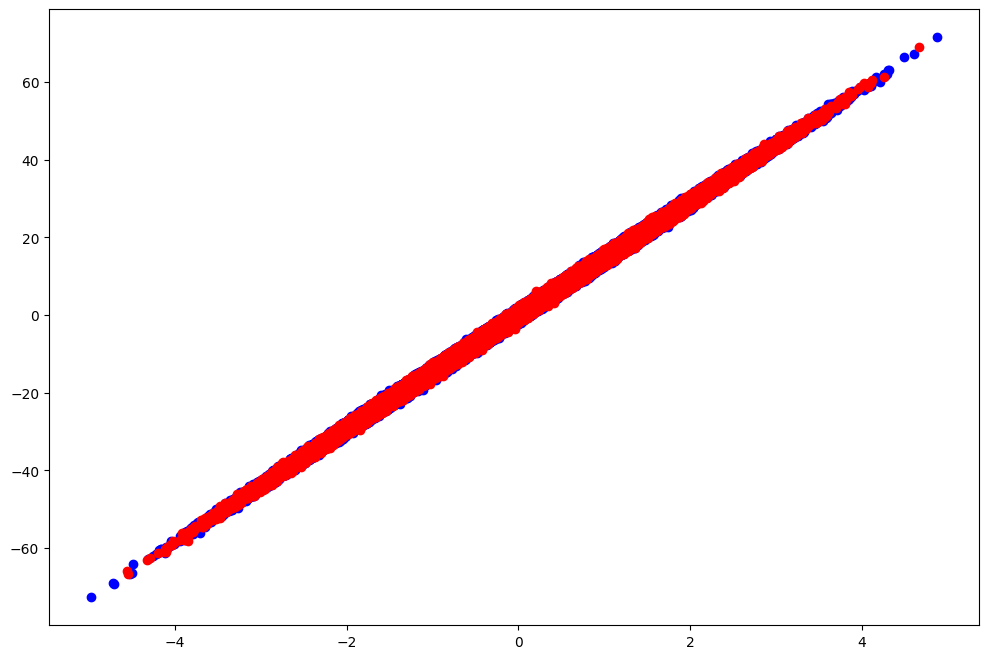

In [21]:
# 3d plot
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,0].get(),y_train.get(),c='blue',label='Train')
plt.scatter(X_test[:,0].get(),y_test.get(),c='red',label='Test')
plt.show()

In [22]:
print(X_train.shape)
print(y_train.shape)

(680000, 1)
(680000,)


In [23]:
# Assuming X_train and y_train are your training data
model = LinearRegression(lr=0.01, n_itters=1000, use_gradient_descent=False)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = model.mean_squared_error(y_test, predictions)

print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.3585711155000233


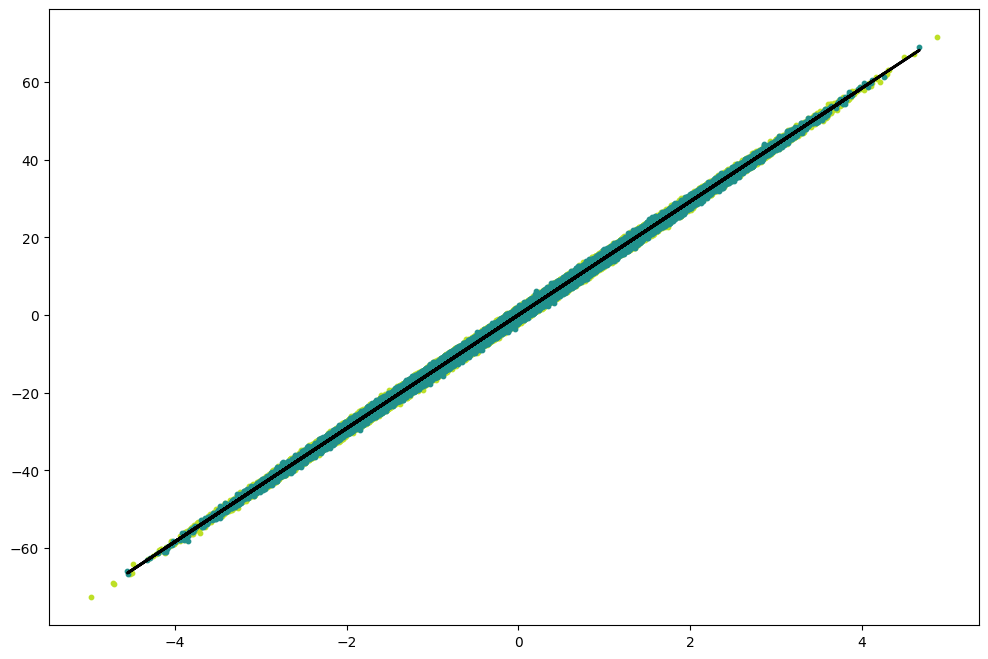

In [24]:
y_predicted_line = predictions
cmap = plt.get_cmap('viridis')
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,0].get(),y_train.get(),color=cmap(0.9),s=10)
plt.scatter(X_test[:,0].get(),y_test.get(),color=cmap(0.5),s=10)
plt.plot(X_test[:,0].get(),y_predicted_line.get(),color='black',linewidth=2,label='Prediction')
plt.show()

Predictions: [  0.20098527  10.04549813 -20.17117706 ...  13.87807463  21.21237884
  20.55322503]
Shapes -> X_train: (680000, 1), y_train: (680000,), X_test: (320000, 1), y_test: (320000,), predictions: (320000,)


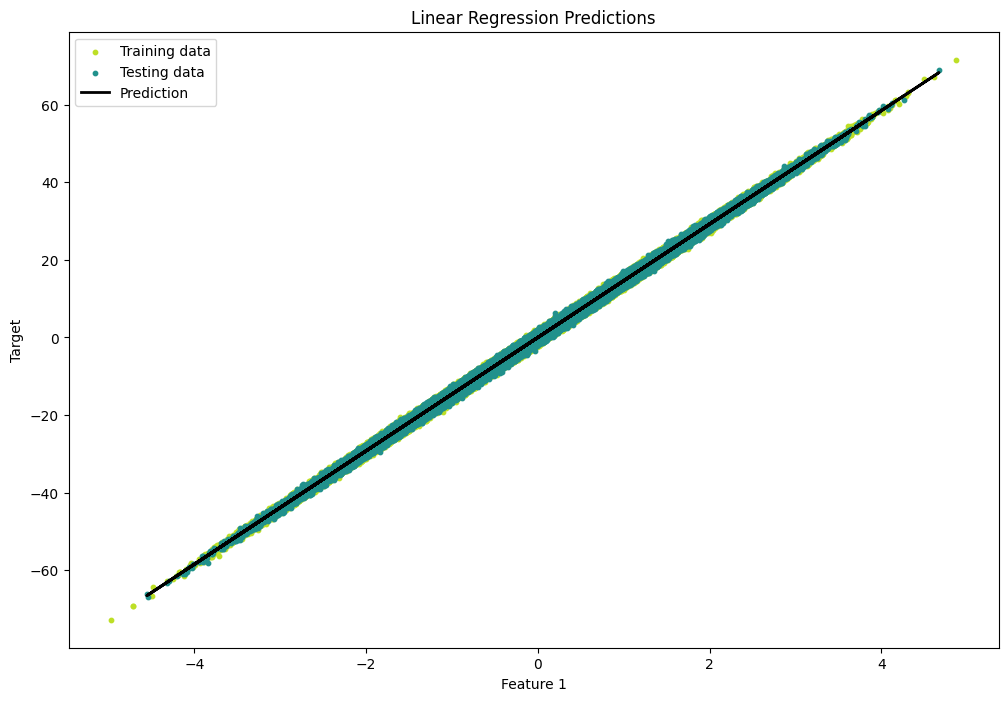

In [25]:
import matplotlib.pyplot as plt

# Ensure your predictions are correct and have the right shape
predictions = model.predict(X_test)
print(f"Predictions: {predictions}")  # Print predictions for debugging

# Check the shapes
print(f"Shapes -> X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}, predictions: {predictions.shape}")

# Ensure that your prediction is the same length as y_test
if predictions.shape[0] != y_test.shape[0]:
    raise ValueError("The length of predictions does not match the length of y_test.")

# Visualization
y_predicted_line = predictions  # This should be your predicted line
cmap = plt.get_cmap('viridis')
plt.figure(figsize=(12, 8))

# Scatter plots for training and testing data
plt.scatter(X_train[:, 0].get(), y_train.get(), color=cmap(0.9), s=10, label='Training data')
plt.scatter(X_test[:, 0].get(), y_test.get(), color=cmap(0.5), s=10, label='Testing data')

# Plotting the predictions
plt.plot(X_test[:, 0].get(), y_predicted_line.get(), color='black', linewidth=2, label='Prediction')

# Adding labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()


In [ ]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of values for the two features
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Stack the grids to pass them to the model for predictions
grid = cp.vstack([cp.array(x1_grid.flatten()), cp.array(x2_grid.flatten())]).T

# Get predictions for the grid
predicted_grid = model.predict(grid)

# Reshape the predictions to match the grid shape
predicted_grid = predicted_grid.get().reshape(x1_grid.shape)

# Create the contour plot
plt.figure(figsize=(12, 8))
contour = plt.contourf(x1_grid.get(), x2_grid.get(), predicted_grid, levels=50, cmap='viridis', alpha=0.8)
plt.colorbar(contour)
plt.scatter(X_train[:, 0].get(), X_train[:, 1].get(), color='blue', s=10, label='Train Data')
plt.scatter(X_test[:, 0].get(), X_test[:, 1].get(), color='orange', s=10, label='Test Data')
plt.title('Prediction Contour Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [ ]:
import cupy as cp
import matplotlib.pyplot as plt

# Assume predictions and data are already defined
y_predicted_line = predictions

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot for feature 1 (X_train[:, 0]) vs. y
ax[0].scatter(X_train[:, 0].get(), y_train.get(), color='blue', s=10, label='True Values (Train)')
ax[0].scatter(X_test[:, 0].get(), y_test.get(), color='orange', s=10, label='True Values (Test)')
ax[0].scatter(X_test[:, 0].get(), y_predicted_line.get(), color='black', linewidth=2, label='Predictions')
ax[0].set_title('Feature 1 vs Target')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Target')
ax[0].legend()

# Plot for feature 2 (X_train[:, 1]) vs. y
ax[1].scatter(X_train[:, 1].get(), y_train.get(), color='blue', s=10, label='True Values (Train)')
ax[1].scatter(X_test[:, 1].get(), y_test.get(), color='orange', s=10, label='True Values (Test)')
ax[1].scatter(X_test[:, 1].get(), y_predicted_line.get(), color='black', linewidth=2, label='Predictions')
ax[1].set_title('Feature 2 vs Target')
ax[1].set_xlabel('Feature 2')
ax[1].set_ylabel('Target')
ax[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting the values for the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse_train = mean_squared_error(y_train.get(), y_train_pred.get())
mse_test = mean_squared_error(y_test.get(), y_test_pred.get())

# Calculate R² Score
r2_train = r2_score(y_train.get(), y_train_pred.get())
r2_test = r2_score(y_test.get(), y_test_pred.get())

print(f"Training Mean Squared Error: {mse_train:.4f}")
print(f"Test Mean Squared Error: {mse_test:.4f}")
print(f"Training R² Score: {r2_train:.4f}")
print(f"Test R² Score: {r2_test:.4f}")


In [10]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt
import time


class LinearRegression:
    def __init__(self, lr=0.001, n_itters=10000, use_gradient_descent=False) -> None:
        self.lr = lr
        self.n_itters = n_itters
        self.use_gradient_descent = use_gradient_descent
        self.weights = None
        self.bias = None

    def fit(self, X: cp.array, y: cp.array):
        n_samples, n_features = X.shape
        self.weights = cp.zeros(n_features)
        self.bias = cp.zeros(1)  # Change this line

        if self.use_gradient_descent:
            # Set up the plot
            plt.ion()  # Turn on interactive mode
            fig, ax = plt.subplots()
            ax.set_xlim(cp.min(X.get()) - 1, cp.max(X.get()) + 1)
            ax.set_ylim(cp.min(y.get()) - 1, cp.max(y.get()) + 1)
            scatter = ax.scatter(X.get(), y.get(), color="blue", label="Data Points")
            (line,) = ax.plot([], [], color="red", label="Regression Line")

            for _ in range(self.n_itters):
                y_predicted = cp.dot(X, self.weights) + self.bias
                dw = (1 / n_samples) * cp.dot(X.T, (y_predicted - y))
                db = (1 / n_samples) * cp.sum(y_predicted - y)

                self.weights -= self.lr * dw
                self.bias -= self.lr * db

                # Update the line for visualization
                line.set_xdata(X.get())
                line.set_ydata(
                    cp.dot(X, self.weights).get() + self.bias.get()
                )  # Change this line

                # Update the scatter points for current predictions
                if "current_prediction" in ax.collections:
                    ax.collections.remove(
                        ax.collections[-1]
                    )  # Remove the last prediction points

                ax.scatter(
                    X.get(),
                    y_predicted.get(),
                    color="orange",
                    label="Current Prediction",
                    alpha=0.5,
                )

                plt.draw()
                plt.pause(0.1)  # Pause to create an animation effect
                ax.scatter(X.get(), y.get(), color="blue", label="Data Points")
                time.sleep(0.1)  # Add delay to slow down the iteration

            plt.ioff()  # Turn off interactive mode
            plt.show()  # Keep the plot open after training

        else:
            # Closed-form solution
            self.weights = cp.linalg.inv(X.T @ X) @ (X.T @ y)

    def predict(self, X):
        y_predict = cp.dot(X, self.weights) + self.bias
        return y_predict

    def mean_squared_error(self, y_true, y_pred):
        return cp.mean((y_true - y_pred) ** 2)

In [ ]:
X = cp.array([[1], [2], [3], [4], [5]])
y = cp.array([1, 2, 3, 4, 5])

model = LinearRegression(lr=0.01, n_itters=50, use_gradient_descent=True)
model.fit(X, y)
